In [1]:
import pandas as pd

iris_df = pd.read_csv('/content/Iris.csv')
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
print("Missing values in each column:")
print(iris_df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(iris_df.describe())

Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Descriptive statistics for numerical columns:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



Matplotlib and Seaborn imported successfully for visualization.


In [ ]:
numerical_cols = iris_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col != 'Id': # 'Id' column is not a feature for distribution analysis
        plt.subplot(2, 2, i+1)
        sns.histplot(iris_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

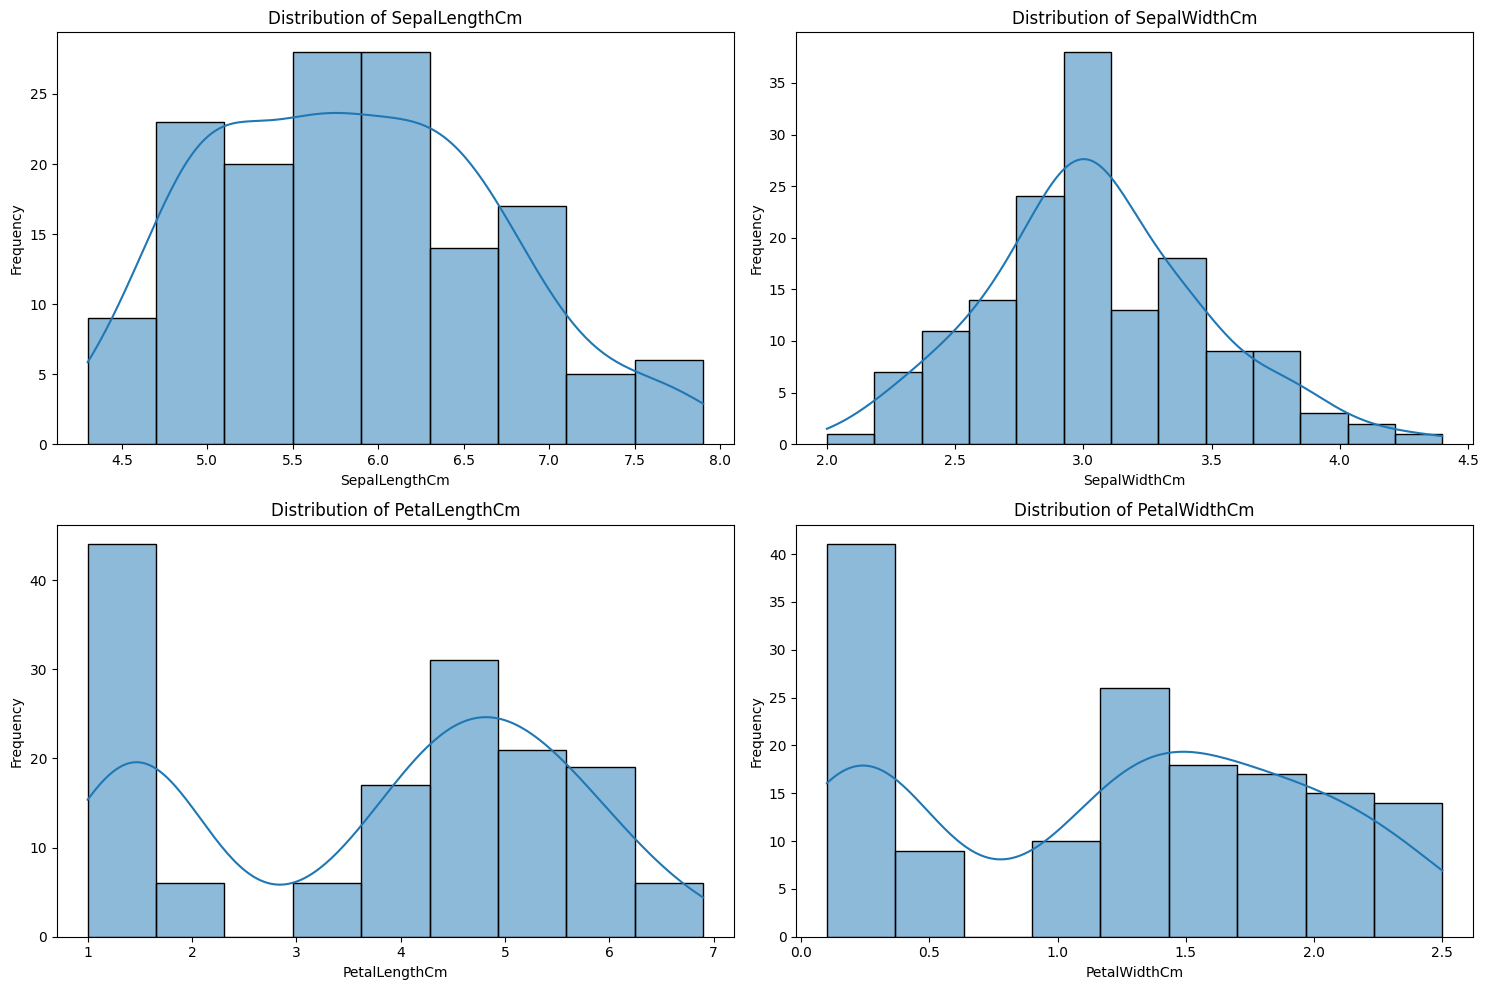

In [5]:
numerical_cols = iris_df.select_dtypes(include=['number']).columns
# Filter out 'Id' column as it's not a feature for distribution analysis
features_to_plot = [col for col in numerical_cols if col != 'Id']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1) # This will correctly create subplots from 1 to 4
    sns.histplot(iris_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

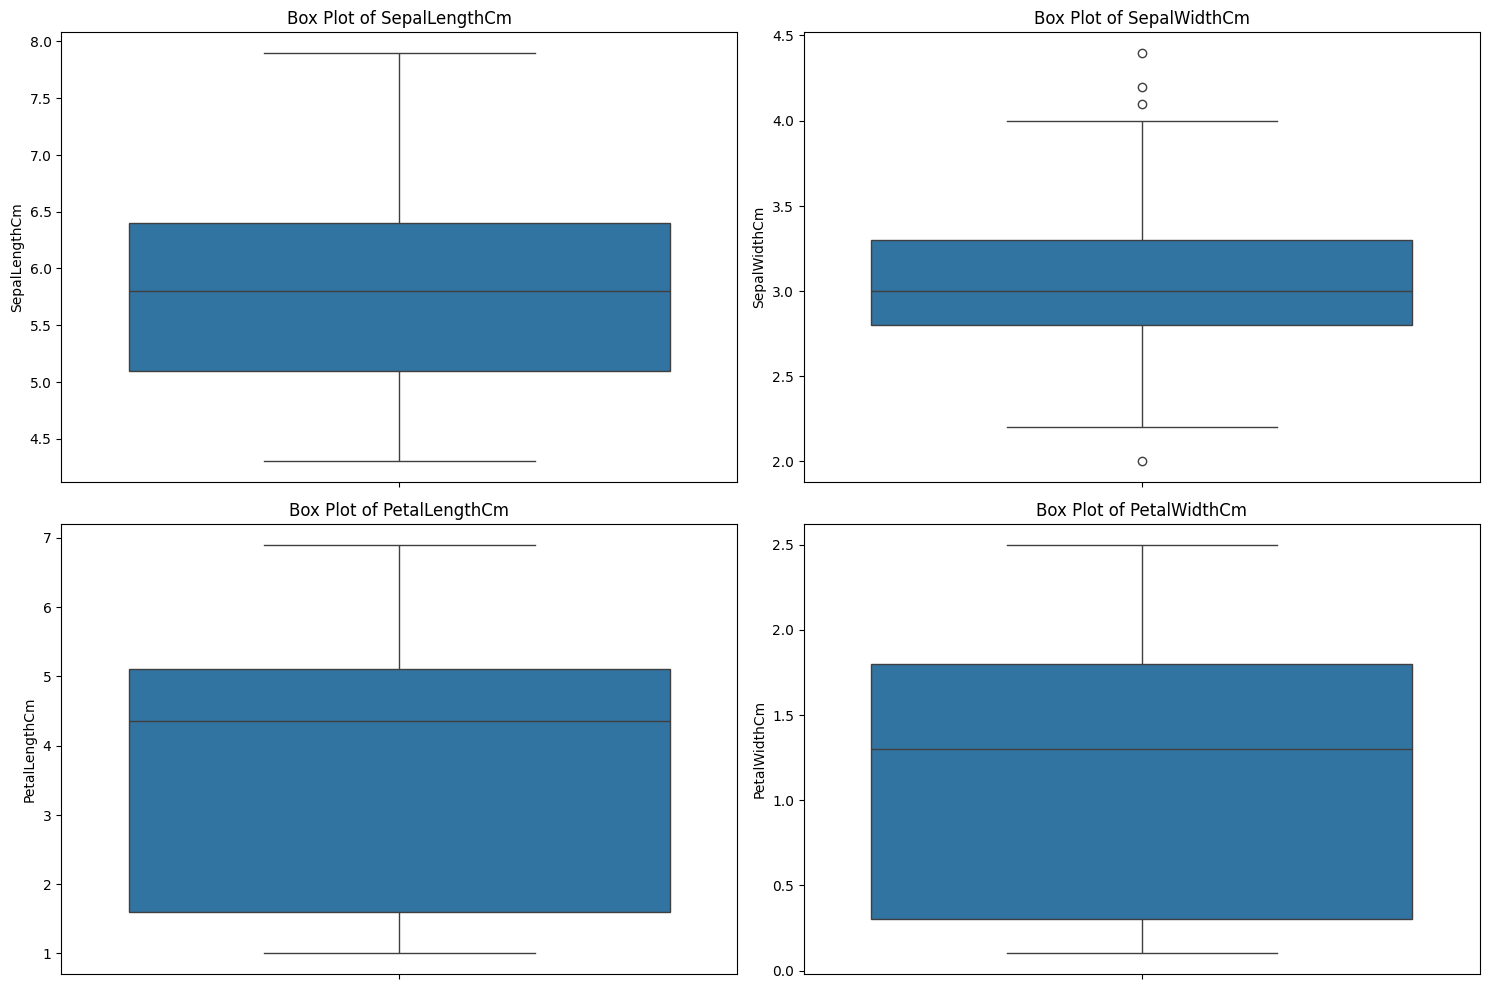

In [6]:
numerical_cols = iris_df.select_dtypes(include=['number']).columns
# Filter out 'Id' column as it's not a feature for box plot analysis
features_to_plot = [col for col in numerical_cols if col != 'Id']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=iris_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

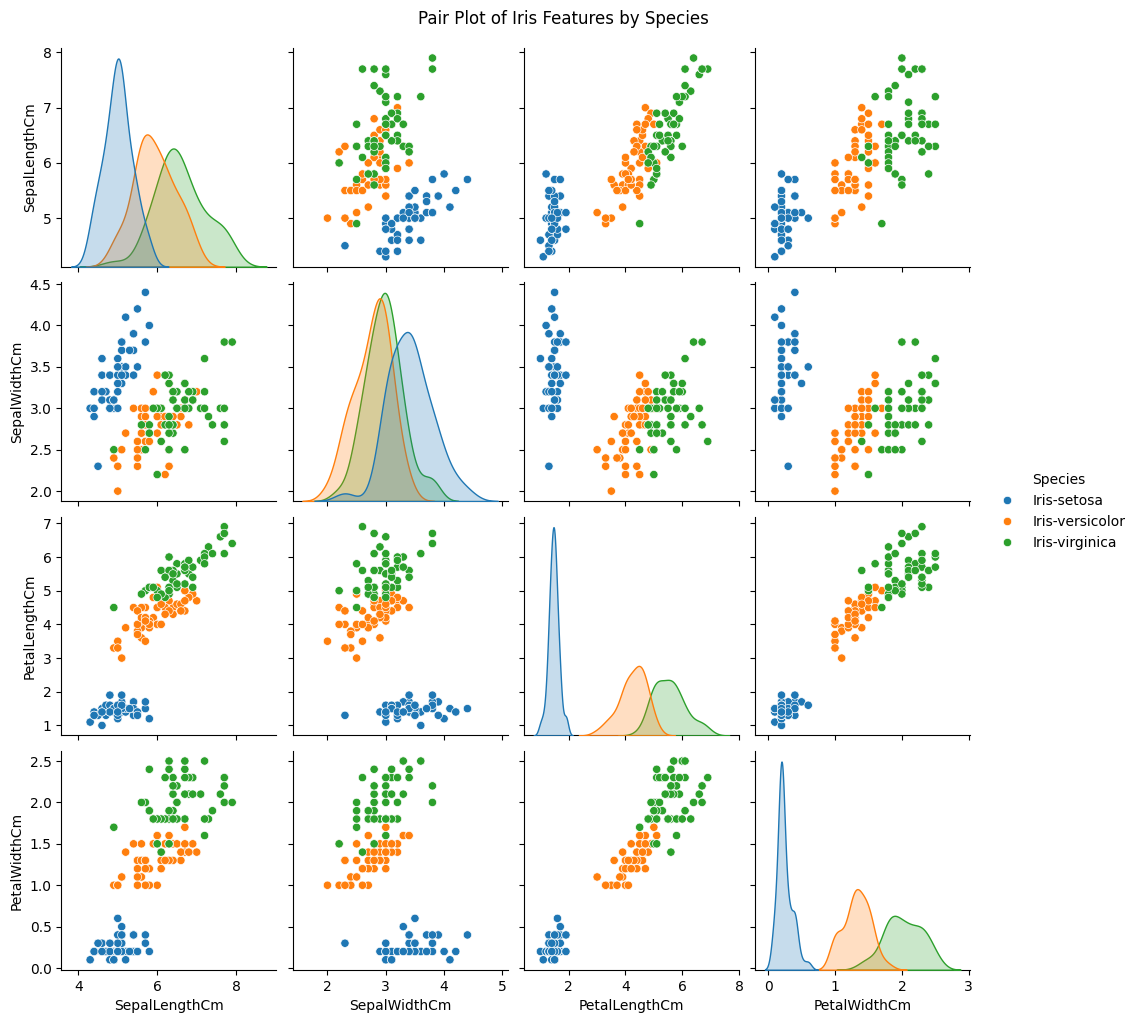

In [7]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df.drop('Id', axis=1), hue='Species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle position
plt.show()

/tmp/ipython-input-2054507806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=iris_df, palette='viridis')


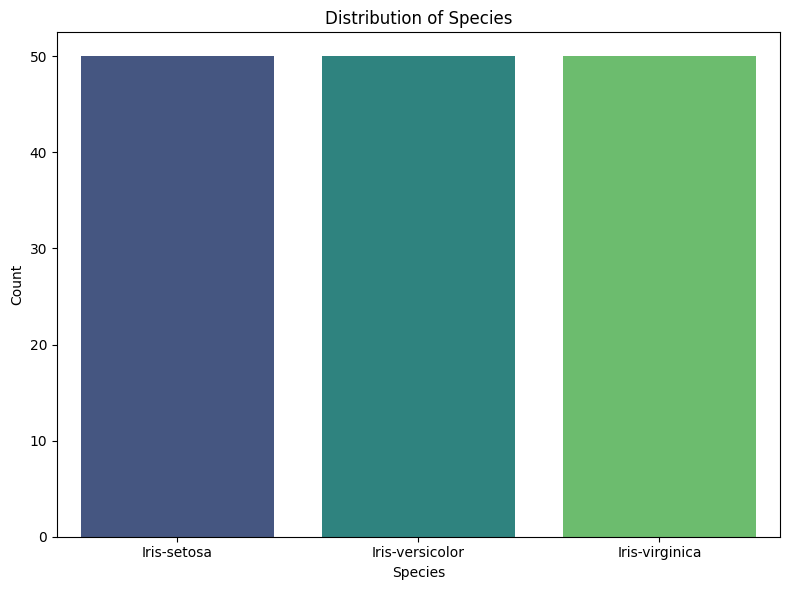

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=iris_df, palette='viridis')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

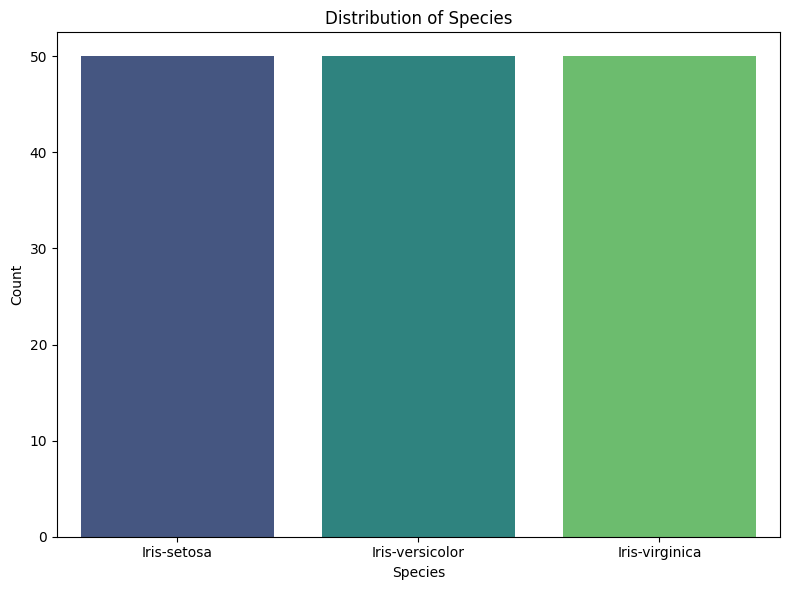

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=iris_df, hue='Species', legend=False, palette='viridis')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_df['Species']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Target (y) head:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print("Encoded Target (y) head:")
print(y[:5])
print("\nUnique encoded classes:")
print(list(le.classes_))


Encoded Target (y) head:
[0 0 0 0 0]

Unique encoded classes:
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("First 5 rows of X_train_scaled:\n", X_train_scaled[:5])

X_train_scaled shape: (105, 4)
X_test_scaled shape: (45, 4)
First 5 rows of X_train_scaled:
 [[-0.4134164  -1.46440146 -0.10014569 -0.32149987]
 [ 0.55122187 -0.49582097  0.71771076  0.35364985]
 [ 0.67180165  0.2306144   0.95138404  0.75873969]
 [ 0.91296121 -0.01153072  0.30878254  0.21861991]
 [ 1.63643991  1.44134002  1.30189395  1.7039493 ]]


## Train KNN Model





In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

print("KNN model trained successfully with n_neighbors=5.")

KNN model trained successfully with n_neighbors=5.


In [15]:
from sklearn.metrics import accuracy_score

y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the test set: {accuracy:.4f}")

Model Accuracy on the test set: 1.0000


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


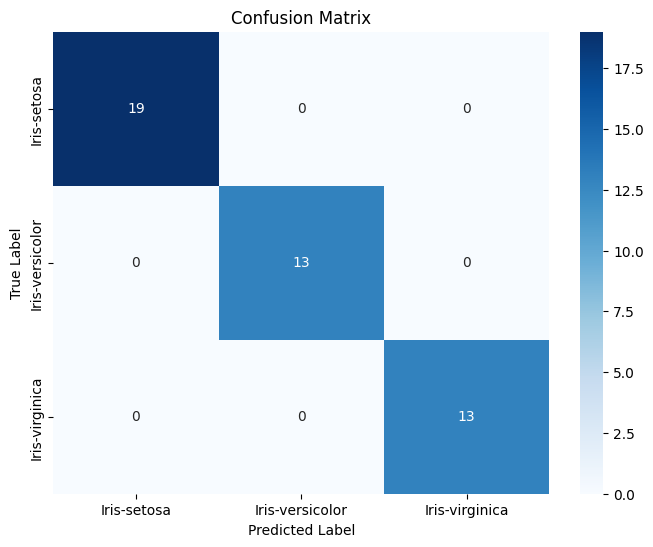

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
import numpy as np

# 1. Define a new data point
# Example: A new flower with SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2
new_data = np.array([[5.1, 3.5, 1.4, 0.2]]) # Ensure it's a 2D array for the scaler and model

print(f"New data point: {new_data[0]}")

# 2. Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)
print(f"Scaled new data point: {new_data_scaled[0]}")

# 3. Use the trained knn_model to predict the class of the scaled new data
predicted_label_numeric = knn_model.predict(new_data_scaled)

# 4. Use the le.inverse_transform() method to convert the predicted numerical label back to its original species name
predicted_species = le.inverse_transform(predicted_label_numeric)

# 5. Print the original new data and its predicted species name
print(f"Predicted Species for the new data point {new_data[0]} is: {predicted_species[0]}")


New data point: [5.1 3.5 1.4 0.2]
Scaled new data point: [-0.89573553  1.19919489 -1.443767   -1.40173942]
Predicted Species for the new data point [5.1 3.5 1.4 0.2] is: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np
import pandas as pd

# 1. Define a new data point as a DataFrame with the same column names as X_train
# Example: A new flower with SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2
new_data_values = np.array([[5.1, 3.5, 1.4, 0.2]])

# Get column names from X (which were used to create X_train)
feature_names = X.columns.tolist()
new_data_df = pd.DataFrame(new_data_values, columns=feature_names)

print(f"New data point:\n{new_data_df}")

# 2. Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_df)
print(f"Scaled new data point: {new_data_scaled[0]}")

# 3. Use the trained knn_model to predict the class of the scaled new data
predicted_label_numeric = knn_model.predict(new_data_scaled)

# 4. Use the le.inverse_transform() method to convert the predicted numerical label back to its original species name
predicted_species = le.inverse_transform(predicted_label_numeric)

# 5. Print the original new data and its predicted species name
print(f"Predicted Species for the new data point {new_data_df.iloc[0].values} is: {predicted_species[0]}")

New data point:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
Scaled new data point: [-0.89573553  1.19919489 -1.443767   -1.40173942]
Predicted Species for the new data point [5.1 3.5 1.4 0.2] is: Iris-setosa
